# Atividade 06 - Implementação da fase backward

Com as informações discutidas no fórum anterior, implemente a fase backward na tarefa anterior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoide
from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings("ignore")

In [2]:
# CARREGAMENTO DOS DADOS

X = np.array([[0, 0], [0, 1],
              [1, 0], [1, 1]])

y = np.array([[0], [1], [1], [0]])

In [3]:
class RedeNeuralXOR(BaseEstimator, ClassifierMixin):
    "Implementa uma rede neural com 3 camadas (entrada, oculta, saída)"
    
    def __init__(self):
        # Inicializa a rede neural
        self.taxa_aprendizado = 0.02
        self.numero_nos_entrada = 2
        self.numero_nos_ocultos = 2
        self.numero_nos_camada_saida = 1

        # Inicializa os pesos de forma randomica
        self.w_camada_oculta = np.random.random(size=(self.numero_nos_entrada, self.numero_nos_ocultos))
        self.b_camada_oculta = np.random.random(size=(1, self.numero_nos_ocultos))
        self.w_camada_saida = np.random.random(size=(self.numero_nos_ocultos, self.numero_nos_camada_saida))
        self.b_camada_saida = np.random.random(size=(1, self.numero_nos_camada_saida))

    def derivada_sigmoide(self, x):
        return x * (1 - x)

    def erro(self, y, y_calculado):
        return 0.5 * (y - y_calculado)**2

    def fit(self, X, y):
        # Treina a rede neural enquanto o erro for menor que 1e-4

        while True:
            # Etapa forward
            y_camada_oculta = sigmoide(np.dot(X, self.w_camada_oculta) + self.b_camada_oculta)
            y_calculado = sigmoide(np.dot(y_camada_oculta, self.w_camada_saida) + self.b_camada_saida)

            # Calcula o erro médio de todas as instancias
            e = self.erro(y, y_calculado).mean()
            if e < 1e-4:
                break

            # Etapa backpropagation
            gradiente_camada_saida = (y_calculado - y) * self.derivada_sigmoide(y_calculado)
            gradiente_camada_oculta = gradiente_camada_saida.dot(self.w_camada_saida.T) * self.derivada_sigmoide(y_camada_oculta)

            # Atualização dos parâmetros
            self.w_camada_saida -= self.taxa_aprendizado * y_camada_oculta.T.dot(gradiente_camada_saida)
            self.w_camada_oculta -= self.taxa_aprendizado * X.T.dot(gradiente_camada_oculta)

            self.b_camada_saida -= self.taxa_aprendizado * np.sum(gradiente_camada_saida)
            self.b_camada_oculta -= self.taxa_aprendizado * np.sum(gradiente_camada_oculta)

    # Executa uma query na rede neural
    def predict(self, X):
        y_camada_oculta = sigmoide(np.dot(X, self.w_camada_oculta) + self.b_camada_oculta)
        return sigmoide(np.dot(y_camada_oculta, self.w_camada_saida) + self.b_camada_saida)

In [4]:
# Cria uma instância da classe RedeNeuralXOR
rede_neural_xor = RedeNeuralXOR()

# Fit
rede_neural_xor.fit(X, y)

# Predict
rede_neural_xor.predict(X)

array([[0.0150505 ],
       [0.98651519],
       [0.98651503],
       [0.0144844 ]])

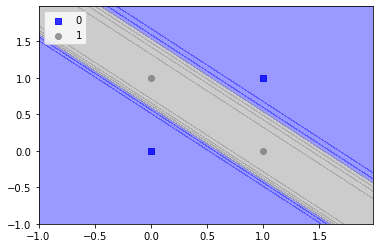

In [5]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    ""
    # setup marker generator and color map
    markers = ('s', 'o', 'x', '^', 'v')
    colors = ('blue', 'gray', 'red', 'lightgreen', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[(y == cl).ravel(), 0],
               y=X[(y == cl).ravel(), 1],
               alpha=0.8, c=colors[idx],
               marker=markers[idx], label=cl)
        
plot_decision_regions(X, y, rede_neural_xor)
plt.legend(loc='upper left')
plt.show()

## Referências utilizadas
https://flipdazed.github.io/blog/python%20tutorial/introduction-to-neural-networks-in-python-using-XOR  
https://chih-ling-hsu.github.io/2017/08/30/NN-XOR  